In [1]:
from wordle_sim import simulate
import pandas as pd
import numpy as np

In [2]:
def apply_simulation(row):
    return np.asarray(simulate(), dtype=object)

In [3]:
simulations = pd.DataFrame(index=range(500))
simulations['num_sim'] = range(500)
simulations[['correct_word', 'guesses', 'round', 'won']] = simulations['num_sim'].apply(apply_simulation).to_list()

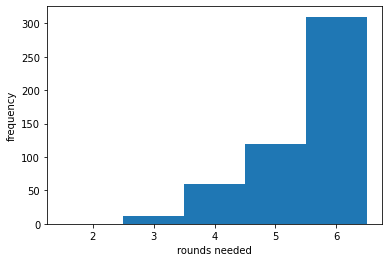

In [4]:
import matplotlib.pyplot as plt
plt.hist(simulations['round'], bins=[1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
plt.xlabel('rounds needed')
plt.ylabel('frequency')
plt.show()

In [5]:
simulations.groupby('round').agg(count=('num_sim', 'count'))

,count
round,
3,12
4,59
5,119
6,310


In [6]:
simulations.groupby('won').agg(count=('num_sim', 'count'))

,count
won,
False,156
True,344
